In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
olympics = pd.read_csv('athlete_events.csv')

In [3]:
olympics = olympics.loc[olympics.Year >= 1994]

# Clean the Team column
# Some of the entries in the column contain the country name followed by a dash and a number, such as China-2.
pd.options.mode.chained_assignment = None
new_Team = [team[:-2] if team[-2] == '-' else team for team in olympics.Team]
olympics.Team = new_Team

top_countries = olympics.groupby('Team').Team.count().sort_values(ascending = False)[0:40,]

In [4]:
olympics = olympics.loc[olympics.Team.isin(top_countries.index)]

In [5]:
top_sports = olympics.groupby('Sport').Sport.count().sort_values(ascending=False)[0:40,]

In [6]:
olympics = olympics.loc[olympics.Sport.isin(top_sports.index)]

In [7]:
medals = olympics.loc[pd.notnull(olympics.Medal)].groupby(['Team','Sport']).Team.count().unstack().fillna(0)
medals

Sport,Alpine Skiing,Archery,Athletics,Badminton,Baseball,Basketball,Biathlon,Bobsleigh,Boxing,Canoeing,...,Snowboarding,Speed Skating,Swimming,Synchronized Swimming,Table Tennis,Tennis,Volleyball,Water Polo,Weightlifting,Wrestling
Team,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
Australia,1.0,5.0,20.0,0.0,24.0,60.0,0.0,0.0,0.0,27.0,...,2.0,0.0,220.0,0.0,0.0,5.0,0.0,39.0,1.0,0.0
Austria,50.0,0.0,2.0,0.0,0.0,0.0,11.0,0.0,0.0,1.0,...,6.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Belarus,0.0,0.0,17.0,0.0,0.0,0.0,8.0,0.0,2.0,22.0,...,0.0,1.0,3.0,0.0,0.0,3.0,0.0,0.0,12.0,11.0
Belgium,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
Brazil,0.0,0.0,16.0,0.0,0.0,24.0,0.0,0.0,4.0,4.0,...,0.0,0.0,12.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0
Bulgaria,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,10.0
Canada,2.0,0.0,19.0,0.0,0.0,0.0,2.0,14.0,1.0,11.0,...,7.0,34.0,23.0,17.0,0.0,2.0,0.0,0.0,1.0,8.0
China,0.0,15.0,21.0,56.0,0.0,0.0,0.0,0.0,12.0,4.0,...,0.0,5.0,53.0,31.0,65.0,4.0,45.0,0.0,42.0,9.0


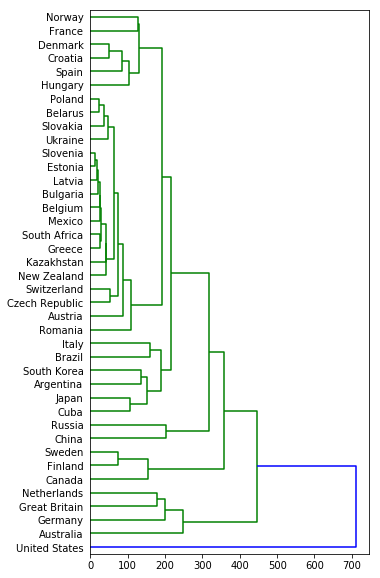

In [9]:
mergings = linkage(medals, method = 'ward')
plt.figure(figsize=(5,10))
dendrogram(mergings, labels = medals.index, leaf_rotation = 0, leaf_font_size = 10, orientation = 'right')
plt.show()

# This dendrogram shows how closely certain countries are related based on their performance in olympic events. 
# Many small European countries are clustered together, such as Slovenia, Estonia, Latvia, and Bulgaria.
# As we move down the dendrogram, we get to larger countries that have won more medals, such as Germany, Australia, and USA. 